In [1]:
# PROGRAMA PARA GRAFICAR A PARTIR DEL ARCHIVO orbitasreo.dat

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from math import *
import numpy as np

In [3]:
# Directorio donde levanta los datos:
dir = "/home/juan/Escritorio/TESIS/PROGRAMAS/EVORB15/COPLANAR/Restricto/2-1/LEY ESTRUCTURA/e2=0.01/long/"
Din = pd.read_csv(dir + 'orbitasreo.sal', delimiter=r"\s+")#, nrows=110012) #Leo el numero de filas hasta supervivencia del objeto
#N_df = len(Din.index) # filas de datos del df 
#print(Din)

### Gráficos:

In [4]:
# Resonancia K2:K1
K2 = 2
K1 = 1

# Numero de particulas y planetas iniciales:
Npar = 44 # N° de partículas
Npla = 1 # N° de planetas
Nobj = Npla + Npar # N° de objetos   

# Tiempos:
T_tot = 500000  # Tiempo de integracion total
DT_esc = 10     # Intervalo de escritura
Nt = int(T_tot/DT_esc) # Tiempo de integracion total / Intervalo de escritura

# Para bajar la precision y que corra mas rápido:
FIL = 1 # FIL es cada cuantos DT_esc tomo un dato. FIL = 1 toma todos los datos.
Din = Din[Din['t'] % int(FIL*DT_esc) == 0]  

# *** FUTURA MEJORA: Obtener Npar, Npla y Nt del archivo datos.dat que usa el EVORB15. ***

# DEFINO LOS INDICES DE LOS OBJETOS:
obj = np.insert(np.arange(10, 10 + Npar), 0 , np.arange(1, 1 + Npla)) # 10 es el indice de la primer particula

# Inicializo matriz 3D con todos los objetos: 
# D =  np.zeros((Nobj, Nt + 1, 8)) # 8 son las columnas que hay en orbitasreo.sal
D = np.empty((Nobj, Nt+1, 8))
D[:] = np.NaN

# Recorro los Nobj indices de objetos y filtro segun columna 'N' para asignar a la matriz 3D 
for i, j in zip(range(len(obj)), obj):
    N_vivo = np.count_nonzero((Din['N'].values == j)) # Esto es para considerar los casos donde la particula es eyectada prematuramente
    D[i, 0:N_vivo, :] =  Din[Din['N'].values == j]

# Paso a dataframe el planeta:
D_pla =  pd.DataFrame(D[0,:,:], columns = ['t','a','e','i','nodo','argper','anomed','N'])

In [5]:
# Elijo el objeto de 0 a Npla+Npar-1 (los primeros son los planetas y los últimos las partículas):
CASO = 6
D_obj = pd.DataFrame(D[CASO,:,:], columns = ['t','a','e','i','nodo','argper','anomed','N'])
# Filtro Dobj segun algun criterio:
# D_pla = D_pla[(D_obj['argper'].values >= 179) & (D_obj['argper'].values <= 181)]
# D_obj = D_obj[(D_obj['argper'].values >= 179) & (D_obj['argper'].values <= 181)]
# D_pla = D_pla[(D_obj['t'].values <= 130000)]
# D_obj = D_obj[(D_obj['t'].values <= 130000)]
# print(D_pla)
# print(D_obj)
# OBTENGO TIEMPO:
t = D_obj['t'].values
#t = np.sort(list(set(t))) # Elimino valores repetidos y luego ordeno
# t = t[np.logical_not(np.isnan(t))] # Remuevo posibles NaNs

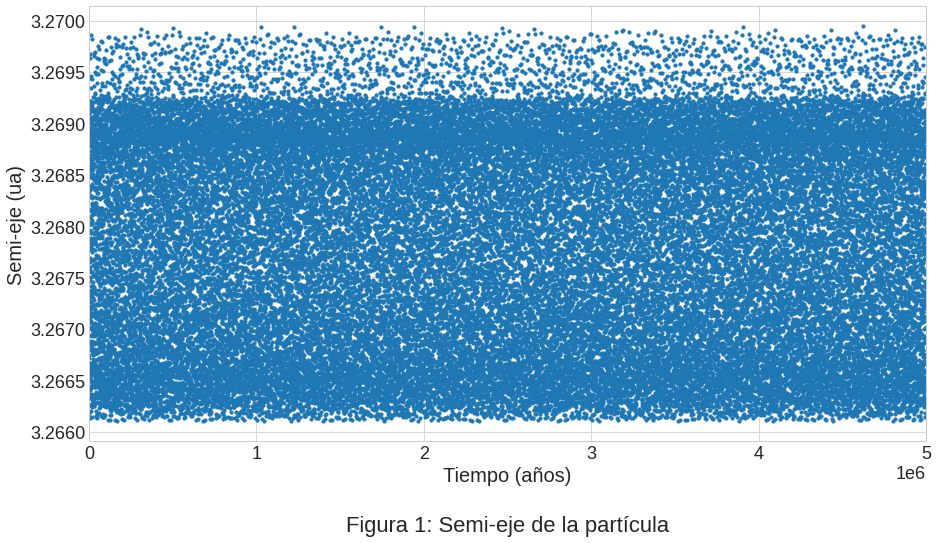

In [6]:
TSPAN = max(t)
#TSPAN = 20000
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
# EJEMPLO:
a1 = D_obj['a'].values
plt.figure(figsize=(15,8))
#plt.plot(t, a1, marker = 'o', ms = 0.01)
plt.scatter(t, a1, s = 10)
plt.xlabel('Tiempo (años)', fontsize=20)
plt.ylabel('Semi-eje (ua)', fontsize=20)
plt.title('Figura 1: Semi-eje de la partícula', y=-0.22,  fontsize=22);
if (not isinf(TSPAN) and not isnan(TSPAN)): 
    plt.xlim([0, TSPAN]);

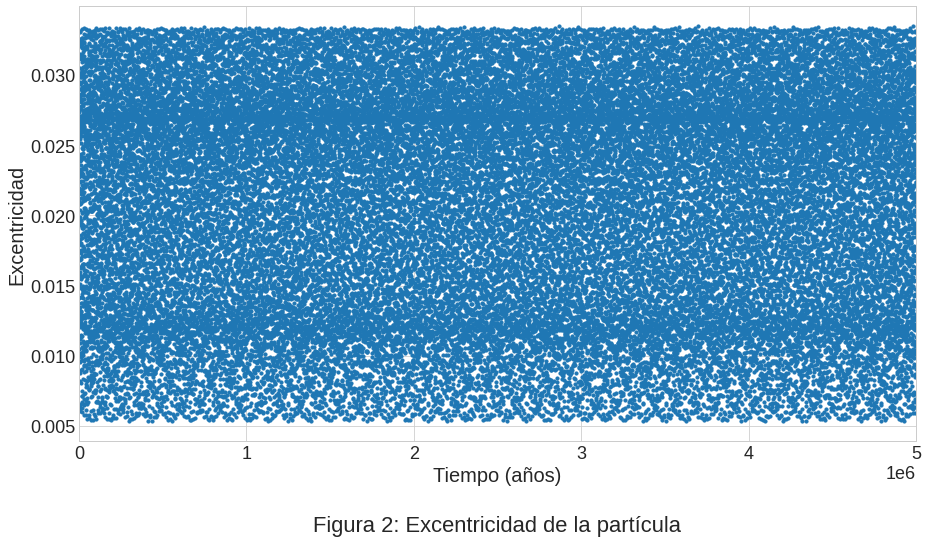

In [7]:
e1 = D_obj['e'].values
plt.figure(figsize=(15,8))
#plt.plot(t, e1, marker = 'o', ms = 0.01)
plt.scatter(t, e1, s = 10)
plt.xlabel('Tiempo (años)', fontsize=20)
plt.ylabel('Excentricidad', fontsize=20)
plt.title('Figura 2: Excentricidad de la partícula', y=-0.22,  fontsize=22);
if (not isinf(TSPAN) and not isnan(TSPAN)): 
    plt.xlim([0, TSPAN]);

In [8]:
lambda1 = D_obj['nodo'].values + D_obj['argper'].values + D_obj['anomed'].values
lambda2 = D_pla['nodo'].values + D_pla['argper'].values + D_pla['anomed'].values
varpi1 = D_obj['nodo'].values + D_obj['argper'].values
varpi2 = D_pla['nodo'].values + D_pla['argper'].values
# DEFINICION DEL SIGMA:
sigma1 = (K1*lambda1 - K2*lambda2 + (K2-K1)*varpi1)
sigma1 = np.remainder(sigma1, 360)
# sigma1 = np.where(sigma1>180, sigma1 - 360, sigma1) # Para pasar de (0, 360) a (-180, 180)
sigma2 = (K1*lambda1 - K2*lambda2 + (K2-K1)*varpi2)
sigma2 = np.remainder(sigma2, 360)
# sigma2 = np.where(sigma2>180, sigma2 - 360, sigma2) # Para pasar de (0, 360) a (-180, 180)

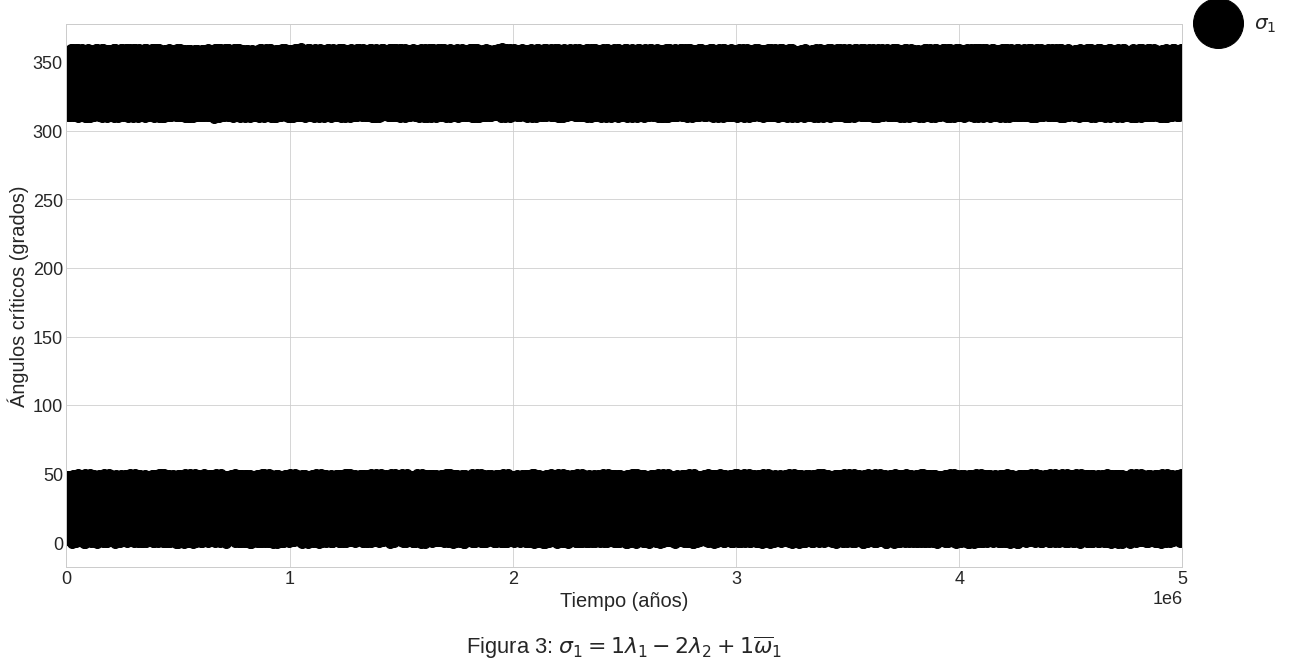

In [9]:
plt.figure(figsize=(20,10))
plt.plot(t, sigma1, 'ko', ms = 10, label = '$\sigma_1$')
# plt.plot(t, sigma1, 'k-', lw=0.3)
#plt.plot(t, sigma2, 'ro', ms = 1, label = '$\sigma_2$')
# plt.plot(t, sigma2, 'r-', lw=0.3)
plt.xlabel('Tiempo (años)', fontsize=20)
plt.ylabel('Ángulos críticos (grados)', fontsize=20)
#plt.title('Figura 3: $\sigma_1 = \lambda_1 - 3\lambda_2 + 2\overline{\omega}_1$ (partícula) y $\sigma_2 = \lambda_1 - 2\lambda_2 + \overline{\omega}_2$ (planeta)', y=-0.22,  fontsize=22);
plt.title('Figura 3: $\sigma_1 = %1.0f \lambda_1 - %1.0f \lambda_2 + %1.0f \overline{\omega}_1$' %(K1, K2, (K2-K1)), y=-0.17,  fontsize=22);
plt.legend(fontsize = 20, markerscale = 5, bbox_to_anchor=(1.1, 1.05));
if (not isinf(TSPAN) and not isnan(TSPAN)): 
    plt.xlim([0, TSPAN]);
#plt.ylim([0, 20]);

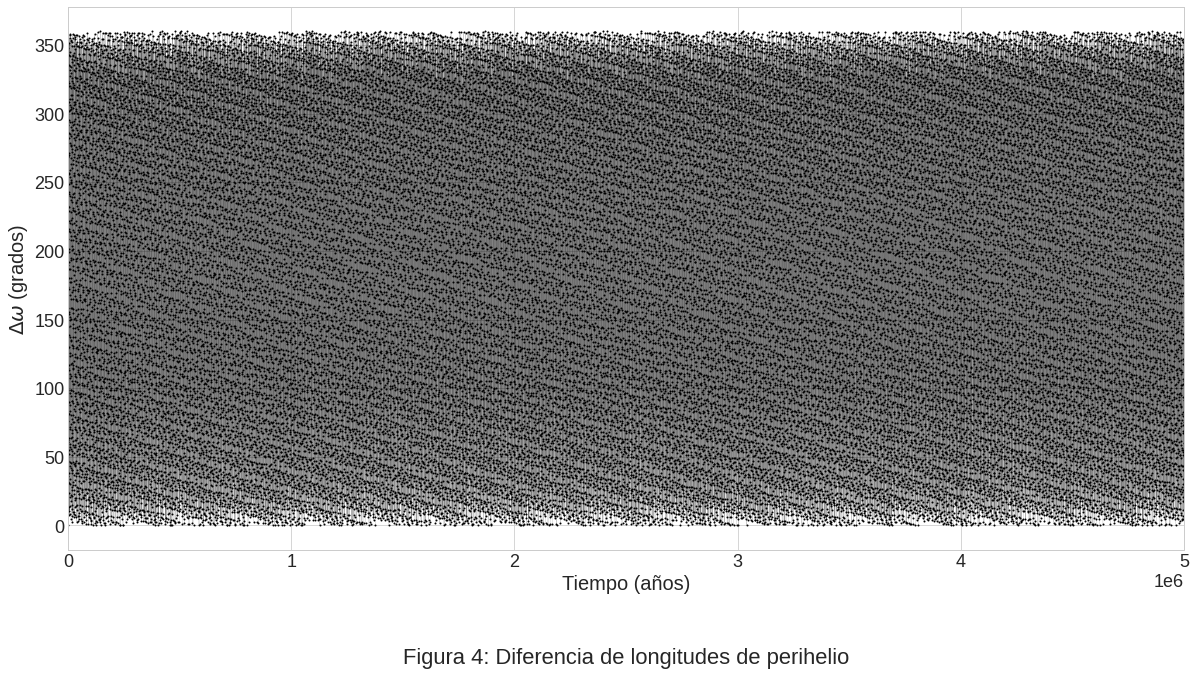

In [10]:
DeltaVarpi = varpi1 - varpi2
DeltaVarpi = np.remainder(DeltaVarpi, 360)
#DeltaVarpi = np.where(DeltaVarpi <0, np.remainder(DeltaVarpi, 360) + 360, np.remainder(DeltaVarpi, 360)) 
#DeltaVarpi = np.where(DeltaVarpi>180, DeltaVarpi - 360, DeltaVarpi) # Para pasar de (0, 360) a (-180, 180)
plt.figure(figsize=(20,10))
plt.plot(t, DeltaVarpi, 'ko', ms = 1)
plt.plot(t, DeltaVarpi, 'k-', lw=0.1)
plt.xlabel('Tiempo (años)', fontsize=20)
plt.ylabel('$\Delta \omega$ (grados)', fontsize=20)
plt.title('Figura 4: Diferencia de longitudes de perihelio', y=-0.22,  fontsize=22);
if (not isinf(TSPAN) and not isnan(TSPAN)): 
    plt.xlim([0, TSPAN]);

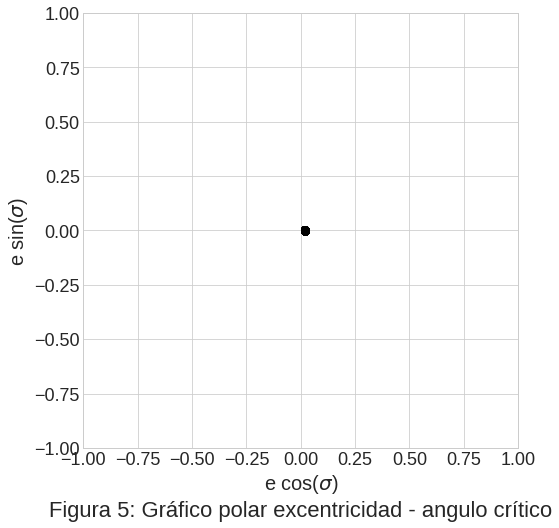

In [11]:
plt.figure(figsize=(8,8))
plt.plot(e1*np.cos(sigma1*pi/180), e1*np.sin(sigma1*pi/180), 'ko', ms = 1)
evorb_x = e1*np.cos(sigma1*pi/180)
evorb_y = e1*np.sin(sigma1*pi/180)
# Para importar variables en otro notebook:
# %store evorb_x
# %store evorb_y
# ****************************************
plt.axis('square')
plt.xlabel('e cos($\sigma$)', fontsize=20)
plt.ylabel('e sin($\sigma$)', fontsize=20)
plt.title('Figura 5: Gráfico polar excentricidad - angulo crítico', y=-0.17,  fontsize=22);
plt.xlim([-1, 1]);
plt.ylim([-1, 1]);

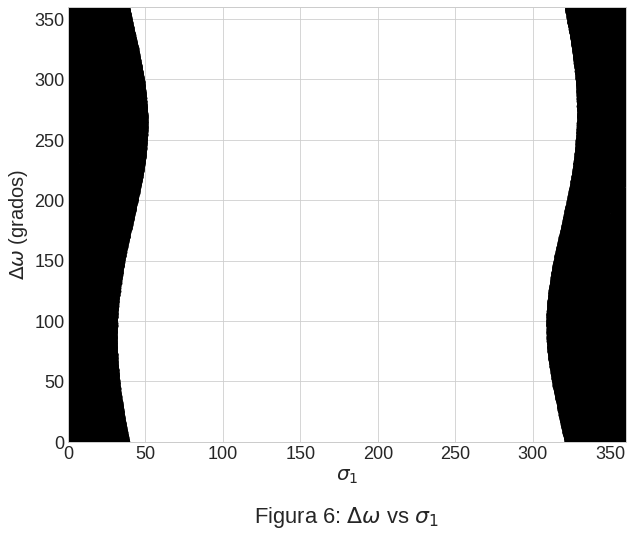

In [12]:
plt.figure(figsize=(10,8))
plt.plot(sigma1, DeltaVarpi,  'k.', lw=0.1)
plt.xlabel('$\sigma_1$', fontsize=20)
plt.ylabel('$\Delta\omega$ (grados)', fontsize=20)
plt.title('Figura 6: $\Delta\omega$ vs $\sigma_1$', y=-0.2,  fontsize=22);
plt.xlim([0, 360]);
plt.ylim([0, 360]);

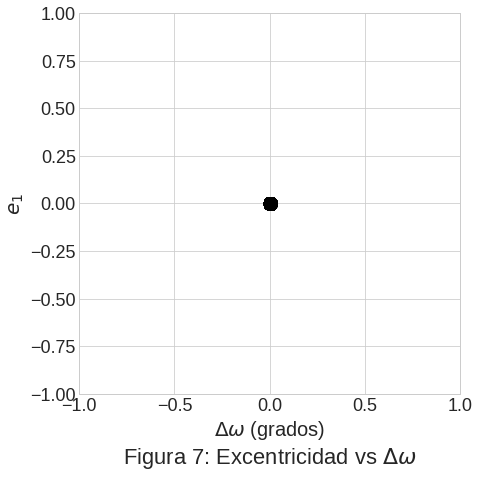

In [13]:
plt.figure(figsize=(12,7))
# plt.plot(DeltaVarpi, e1, 'k.', lw=0.1)
plt.plot(e1*np.cos(DeltaVarpi*pi/180), e1*np.sin(DeltaVarpi*pi/180), 'ko', ms = 1)
plt.ylabel('$e_1$', fontsize=20)
plt.xlabel('$\Delta\omega$ (grados)', fontsize=20)
plt.title('Figura 7: Excentricidad vs $\Delta\omega$', y=-0.2,  fontsize=22);
# plt.xlim([0, 360]);
# plt.ylim([0, 1]);
plt.axis('square')
plt.xlim([-1, 1]);
plt.ylim([-1, 1]);

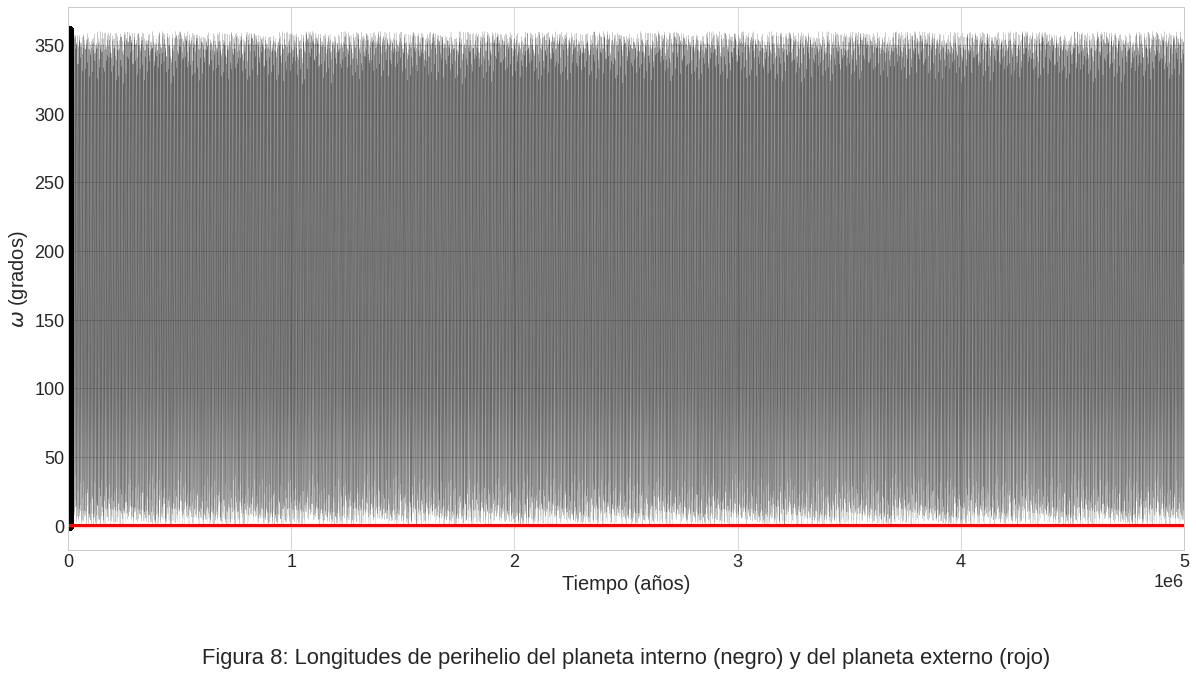

In [14]:
varpi1 = np.remainder(varpi1, 360)
# varpi1 = np.where(varpi1>180, varpi1 - 360, varpi1) # Para pasar de (0, 360) a (-180, 180)
varpi2 = np.remainder(varpi2, 360)
# varpi2 = np.where(varpi2>180, varpi2 - 360, varpi2) # Para pasar de (0, 360) a (-180, 180)
plt.figure(figsize=(20,10))
plt.plot(sigma1, DeltaVarpi, 'ko', ms = 10)
plt.plot(t, varpi1, 'k-', lw=0.1)
plt.plot(t, varpi2, 'ro', ms = 1)
plt.plot(t, varpi2, 'r-', lw=0.1)
plt.xlabel('Tiempo (años)', fontsize=20)
plt.ylabel('$\omega$ (grados)', fontsize=20)
plt.title('Figura 8: Longitudes de perihelio del planeta interno (negro) y del planeta externo (rojo)', y=-0.22,  fontsize=22);
if (not isinf(TSPAN) and not isnan(TSPAN)): 
    plt.xlim([0, TSPAN]);

In [15]:
# FIN DEL PROGRAMA